### Import libraries

In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import re
import gensim
from gensim.utils import simple_preprocess
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from textblob import TextBlob
import numpy as np
from wordcloud import WordCloud



### Read web scrpaed data from Reuters

In [124]:
#parsed_and_scored_news=pd.read_excel('final.xlsx')
#parsed_and_scored_news.head()
df=pd.read_excel('final.xlsx')

### EDA

In [9]:
#Counting by Companies 
for key,count in df.company.value_counts().iteritems():
    print(f"{key}:\t{count}")

SEMICONDUCTOR MANUFACTURING IN:	1480
SQUARE:	1450
IHS MARKIT:	1410
AT&T:	1402
APPLE:	1350
MICROSOFT:	1284
RIO TINTO:	1260
INDUSTRIAL BANK:	1172
PFIZER:	1040
GILEAD SCIENCES:	1036
ASTRAZENECA:	1024
PROGRESSIVE CORP:	962
FIRST SOLAR:	924
INDUSTRIAL  COMMERCIAL BANK:	751
OPEN TEXT:	745
HOUSING DEVELOPMENT FINANCE:	743
JAPAN POST HOLDINGS:	719
MCDONALD'S:	692
PAGE INDUSTRIES:	652
BLACKSTONE GROUP:	541
MERCK & CO:	530
NIKE:	495
ELI LILLY AND CO:	483
CHINA CONSTRUCTION BANK:	478
ELECTRIC POWER DEVELOPMENT:	469
NESTLE:	440
ANGLO AMERICAN:	424
FEDEX:	419
COCA-COLA:	401
GEORGIA CAPITAL:	392
REGENERON PHARMACEUTICALS:	391
CHINA GAS HOLDINGS:	368
GLOBE LIFE:	351
GOLD FIELDS:	342
HDFC BANK:	331
HOME DEPOT:	314
HIP INTERNATIONAL:	311
FERGUSON:	301
ABBOTT LABORATORIES:	288
HONG KONG EXCHANGES  CLEARING:	280
VIACOMCBS:	262
VERIZON COMMUNICATIONS:	256
BARRICK GOLD:	248
WALGREENS BOOTS ALLIANCE:	236
CISCO SYSTEMS:	234
TENCENT HOLDINGS:	225
SALESFORCECOM:	198
AMGEN:	197
CHARTER COMMUNICATIONS:	196
RESOL

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(200,160))
sns.countplot("company", data=df)
plt.show()

<AxesSubplot:>

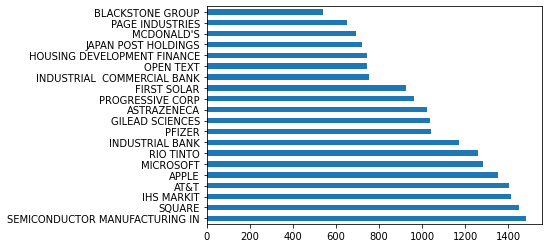

In [14]:
df['company'].value_counts()[:20].plot(kind='barh')

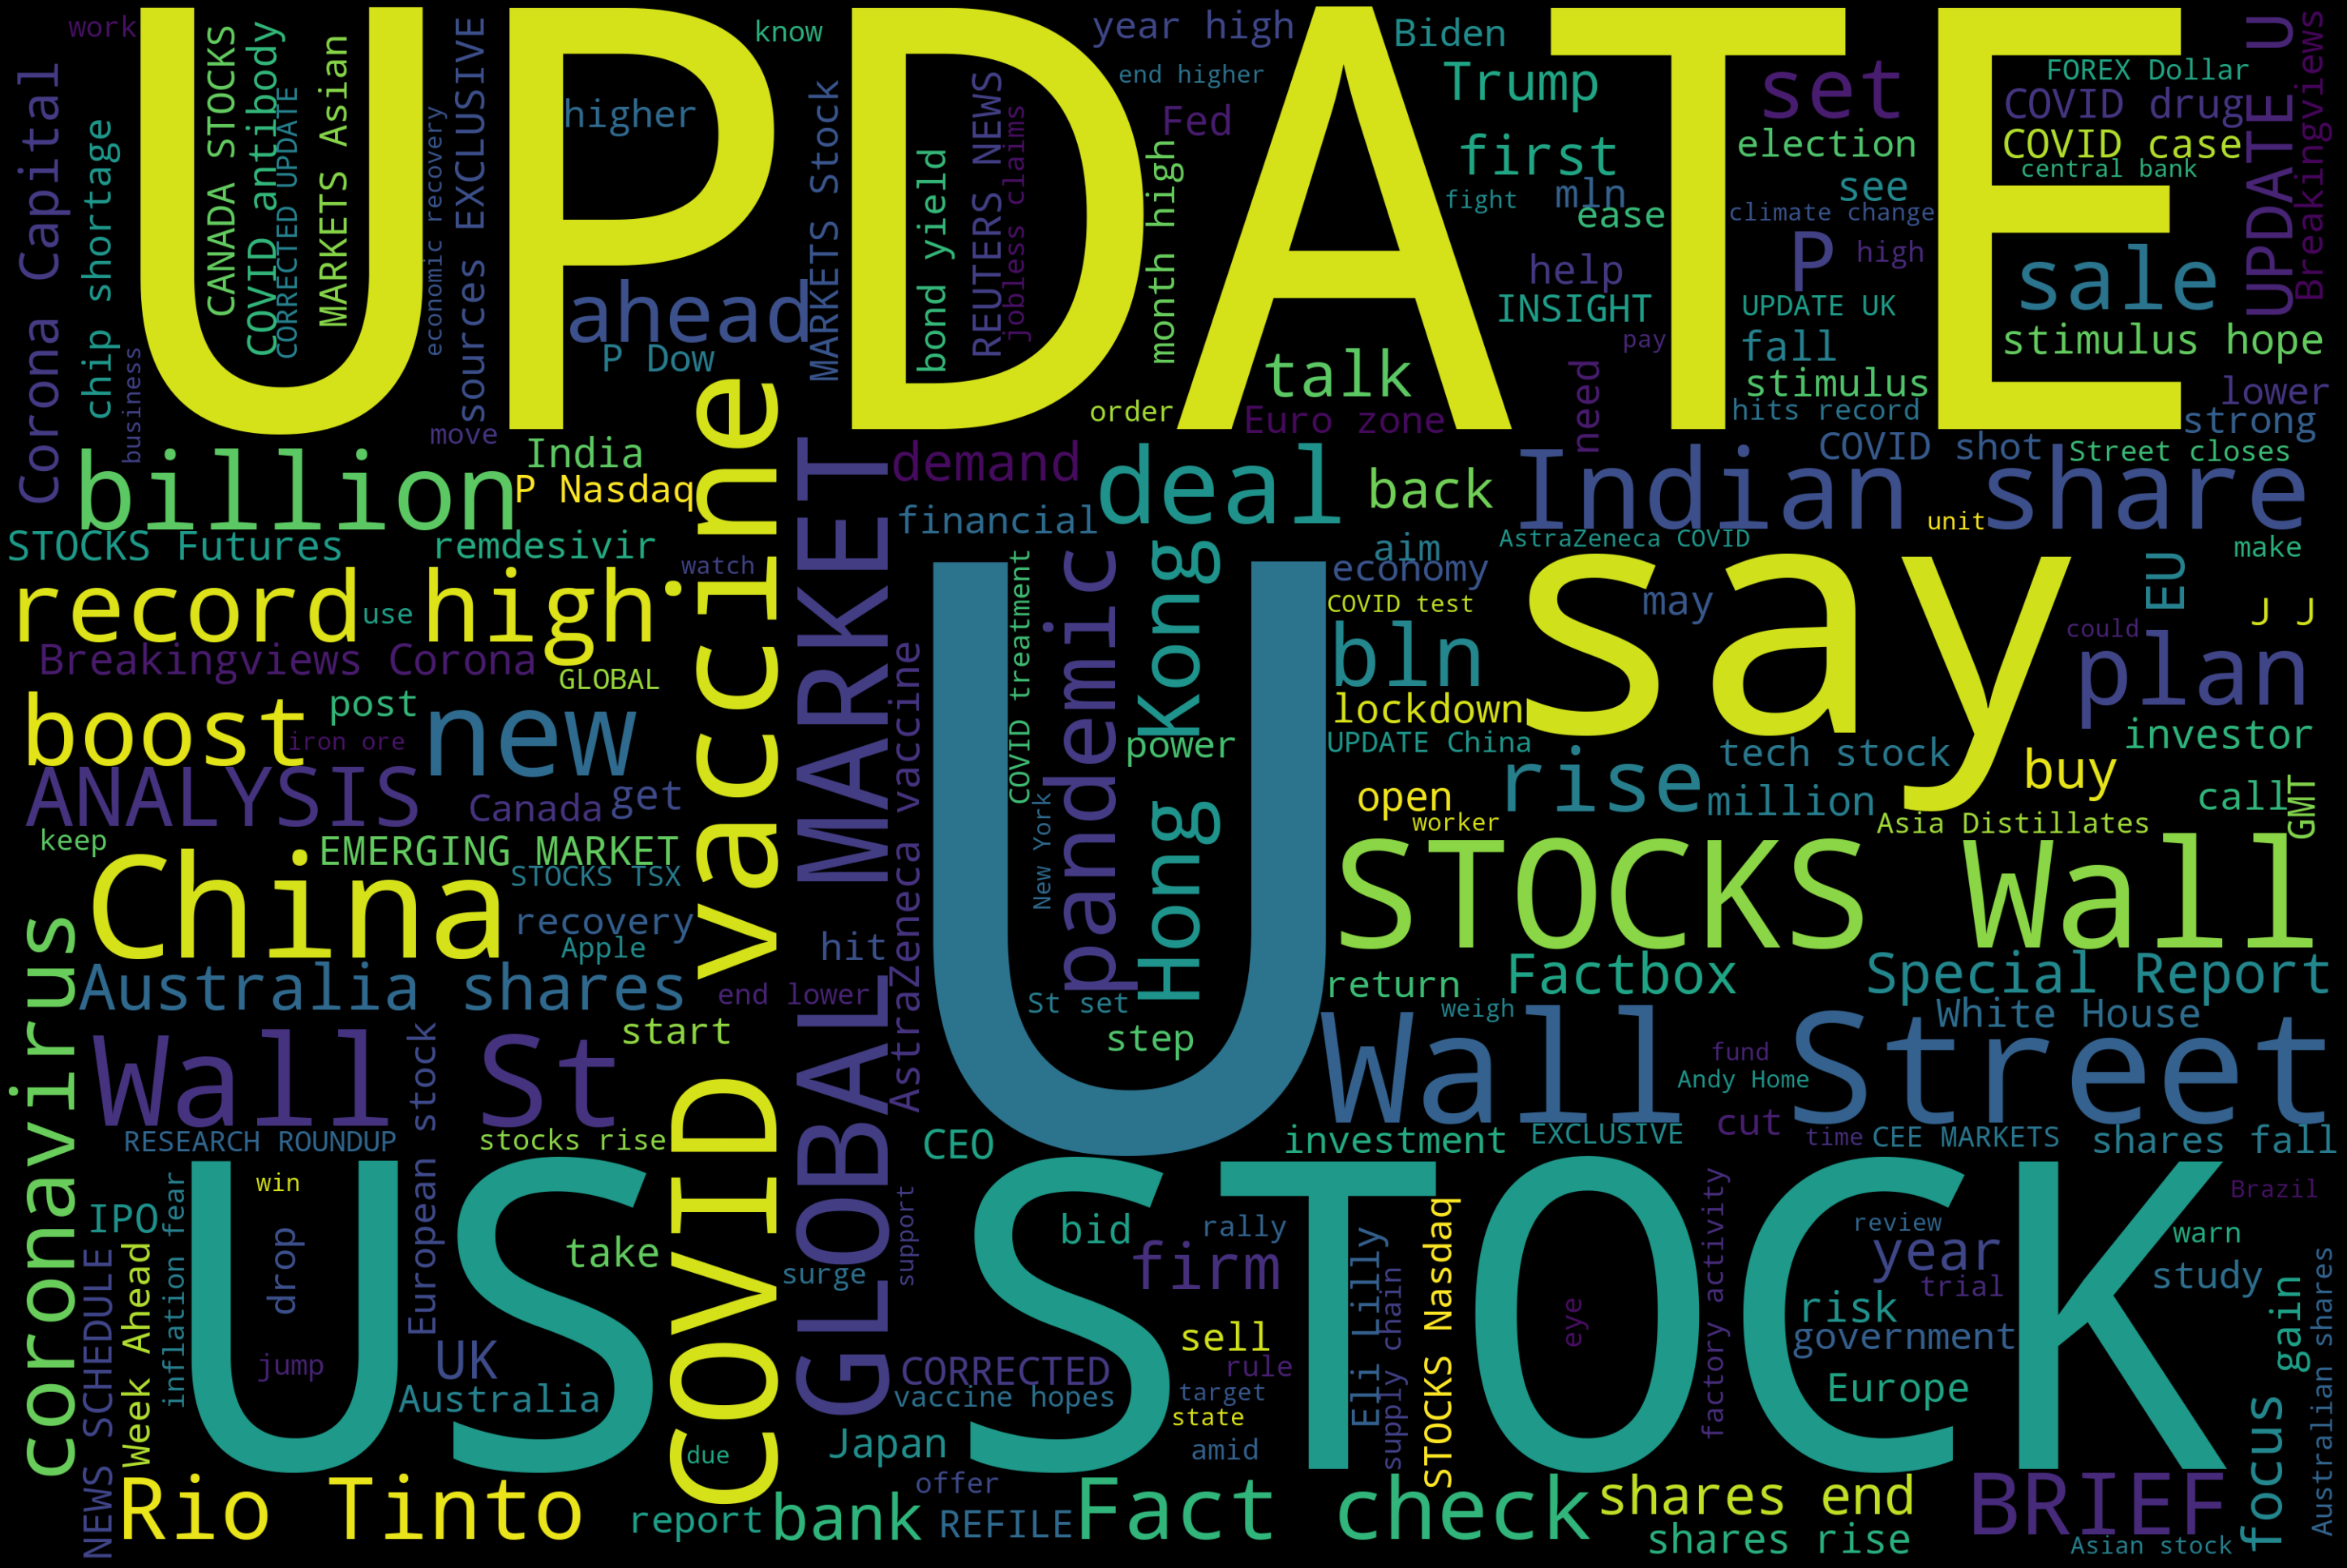

In [23]:
import nltk
import re
from wordcloud import WordCloud

#Word Cloud
text = ''
for news in df.title.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [19]:
# Headlines length
df['tn_words'] = df['title'].str.split()  # Split sentences by spaces and convert into lists of words
df['tn_words'] = df['tn_words'].apply(lambda x: [word for word in x if len(word) > 1])  # Remove words shorter than 2 characters
df['tn_words'] = df['tn_words'].apply(lambda x: len(x))

# Length statistics
min_length = df['tn_words'].min()
max_length = df['tn_words'].max()
mean_length = df['tn_words'].mean()
median_length = df['tn_words'].median()

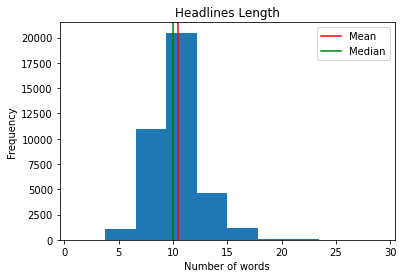

In [20]:
plt.hist(df['tn_words'], bins=10)
plt.axvline(mean_length, color='red', label='Mean')
plt.axvline(median_length, color='green', label='Median')
plt.legend()
plt.title('Headlines Length')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

In [21]:
print(f'Headline length: {min_length} - {max_length} words\nMean length = {mean_length}\nMedian length = {median_length}')

Headline length: 1 - 29 words
Mean length = 10.50973156978406
Median length = 10.0


In [27]:
# Examples of the shortest headlines
df[df['tn_words'] < 5]

title  \
156                     DIARY-U.S. earnings week ahead   
175           BRIEF-Abbott Declares Quarterly Dividend   
254                      《分析》投資人的美國經濟重啟大夢，寄望在抗病毒藥物試驗見效   
255                      《分析》投资人的美国经济重启大梦，寄望在抗病毒药物试验见效   
461                     DIARY-U.S. earnings week ahead   
...                                                ...   
37617  FIRMEN-BLICK-Facebook kauft GIF-Plattform Giphy   
37624                   DIARY-U.S. earnings week ahead   
37885                   DIARY-U.S. earnings week ahead   
38095                   DIARY-U.S. earnings week ahead   
38222                                Down with the Dow   

                                                    link  \
156        https://www.reuters.com/article/idUSL4N2EH34Y   
175        https://www.reuters.com/article/idUSFWN2DP07R   
254        https://www.reuters.com/article/idUSL3T2CF0SI   
255        https://www.reuters.com/article/idUSL3S2CF0SI   
461        https://www.reuters.com/article/idUSL4N2DI392   
...                                                  ...   
37617      https://www.reuters.com/article/idUSL8N2CX6IZ   
37624      https://www.reuters.com/article/idUSL4N2CQ3K0   
37885      https://www.reuters.com/article/idUSL4N2CJ2LD   
38095      https://www.reuters.com/article/idUSL4N2E93C4   
38222  https://www.reuters.com/sponsored/article/down...   

                                                 excerpt  \
156    ... ABT Abbott Laboratories Q2 2020 Abbott... ...   
175    ...June 12 (Reuters) - Abbott Laboratories: * ...   
254    ...投資策略師Salman Ahmed表示。檢測試劑開發者包括雅培(Abbott Labo...   
255    ...投资策略师Salman Ahmed表示。检测试剂开发者包括雅培(Abbott Labo...   
461    ... Release 11-Jun-2020 AMC ADBE.O Adobe Inc Q...   
...                                                  ...   
37617  ... Stellungnahme ab. VF CORP - Bangalore: Der...   
37624  ... Release 15-May-2020 BMO VFC.N VF Corp Q4 2...   
37885  ... ViacomCBS Inc Q1 2020 ViacomCBS Inc Earnin...   
38095  ... Alliance Inc Q3 2020 Walgreens Boots Allia...   
38222  ... or investor should waste time trying to ex...   

                          timestamp  \
156       JULY 10, 2020 12:00PM EDT   
175       JUNE 12, 2020 12:30PM EDT   
254      APRIL 26, 2020 11:07PM EDT   
255      APRIL 26, 2020 11:07PM EDT   
461       JUNE 05, 2020 12:00PM EDT   
...                             ...   
37617      MAY 15, 2020 01:46PM EDT   
37624      MAY 08, 2020 12:03PM EDT   
37885      MAY 01, 2020 12:08PM EDT   
38095     JULY 03, 2020 12:00PM EDT   
38222  OCTOBER 30, 2020 10:58AM EDT   

                                                    body  \
156    ['(For a live blog on the US stock market, cli...   
175    ['June 12 (Reuters) - Abbott Laboratories:', '...   
254    ['路透4月26日 - 投資人把美國經濟重啟的希望寄托在有可能擴大對新冠病毒病例的檢測以及治...   
255    ['路透4月26日 - 投资人把美国经济重启的希望寄托在有可能扩大对新冠病毒病例的检测以及治...   
461    ['(For a live blog on the US stock market, cli...   
...                                                  ...   
37617  ['15 Mai (Reuters) - Es folgt der Reuters-Blic...   
37624  ['(Reuters) - VF Corp VFCN, the maker of Timbe...   
37885  ['May 7 (Reuters) - Media company ViacomCBS In...   
38095  ['July 8 (Reuters) - Walgreens Boots Alliance ...   
38222  ['Do you watch the Dow On television shows and...   

                        company  tn_words  an_words  
156         ABBOTT LABORATORIES         4       391  
175         ABBOTT LABORATORIES         4        19  
254         ABBOTT LABORATORIES         1        45  
255         ABBOTT LABORATORIES         1        45  
461                       ADOBE         4       282  
...                         ...       ...       ...  
37617                   VF CORP         4      1524  
37624                   VF CORP         4       308  
37885                 VIACOMCBS         4        85  
38095  WALGREENS BOOTS ALLIANCE         4        52  
38222         WASTE CONNECTIONS         4      1285  

[152 rows x 8 columns]

In [10]:
# Article length
df['an_words'] = df['body'].str.split()  # Split sentences by spaces and convert into lists of words
df['an_words'] = df['an_words'].apply(lambda x: [word for word in x if len(word) > 1])  # Remove words shorter than 2 characters
df['an_words'] = df['an_words'].apply(lambda x: len(x))

# Length statistics
min_length = df['an_words'].min()
max_length = df['an_words'].max()
mean_length = df['an_words'].mean()
median_length = df['an_words'].median()

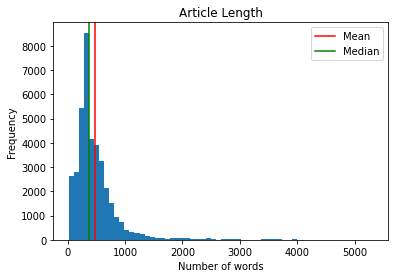

In [16]:
plt.hist(df['an_words'], bins=60)
plt.axvline(mean_length, color='red', label='Mean')
plt.axvline(median_length, color='green', label='Median')
plt.legend()
plt.title('Article Length')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

In [18]:
print(f'Article length: {min_length} - {max_length} words\nMean length = {mean_length}\nMedian length = {median_length}')

Article length: 17 - 5317 words
Mean length = 477.1521710885326
Median length = 368.0


## INITIAL POLARISATION USING TEXTBLOB

In [125]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [126]:
df['clean_body'] = df['body'].apply(get_text_processing)
df.head()

title  \
0  U.S. okays Abbott's rapid COVID-19 test for at...   
1  U.S. okays Abbott's rapid COVID-19 test for at...   
2  Blank-check firm Union Acquisition Corp II to ...   
3  Roche test boss says COVID rapid test effectiv...   
4  UPDATE 1-Roche test boss says COVID rapid test...   

                                            link  \
0  https://www.reuters.com/article/idUSKBN2BO42D   
1  https://www.reuters.com/article/idUSL1N2LS2TL   
2  https://www.reuters.com/article/idUSL4N2LS4GA   
3  https://www.reuters.com/article/idUSKBN2BF1YT   
4  https://www.reuters.com/article/idUSL8N2LL5HU   

                                             excerpt  \
0  ...By Carl O'Donnell (Reuters) - Abbott Labora...   
1  ...By Carl O'Donnell March 31 (Reuters) - Abbo...   
2  ..., which was bought by Abbott Laboratories i...   
3  ... that compete with diagnostics from rivals ...   
4  ... rivals including Abbott Laboratories. "If ...   

                    timestamp  \
0  APRIL 01, 2021 11:55AM EDT   
1  MARCH 31, 2021 11:18PM EDT   
2  MARCH 31, 2021 07:45AM EDT   
3  MARCH 23, 2021 11:24AM EDT   
4  MARCH 23, 2021 11:00AM EDT   

                                                body              company  \
0  ['(Reuters) - Abbott Laboratories said on Wedn...  ABBOTT LABORATORIES   
1  ['(Reuters) - Abbott Laboratories said on Wedn...  ABBOTT LABORATORIES   
2  ['March 31 (Reuters) - US blank-check company ...  ABBOTT LABORATORIES   
3  ['ZURICH (Reuters) - Rapid COVID-19 tests that...  ABBOTT LABORATORIES   
4  ['(Adds details, comment from diagnostics head...  ABBOTT LABORATORIES   

                                          clean_body  
0  Reuters Abbott Laboratories said Wednesday US ...  
1  Reuters Abbott Laboratories said Wednesday US ...  
2  March 31 Reuters US blankcheck company Union A...  
3  ZURICH Reuters Rapid COVID19 tests become key ...  
4  Adds details comment diagnostics head ZURICH M...

In [127]:
df['Polarity'] = np.nan
df['Subjectivity'] = np.nan
df['Score'] = np.nan
df.drop('link',inplace=True, axis=1)
df.head(5)

title  \
0  U.S. okays Abbott's rapid COVID-19 test for at...   
1  U.S. okays Abbott's rapid COVID-19 test for at...   
2  Blank-check firm Union Acquisition Corp II to ...   
3  Roche test boss says COVID rapid test effectiv...   
4  UPDATE 1-Roche test boss says COVID rapid test...   

                                             excerpt  \
0  ...By Carl O'Donnell (Reuters) - Abbott Labora...   
1  ...By Carl O'Donnell March 31 (Reuters) - Abbo...   
2  ..., which was bought by Abbott Laboratories i...   
3  ... that compete with diagnostics from rivals ...   
4  ... rivals including Abbott Laboratories. "If ...   

                    timestamp  \
0  APRIL 01, 2021 11:55AM EDT   
1  MARCH 31, 2021 11:18PM EDT   
2  MARCH 31, 2021 07:45AM EDT   
3  MARCH 23, 2021 11:24AM EDT   
4  MARCH 23, 2021 11:00AM EDT   

                                                body              company  \
0  ['(Reuters) - Abbott Laboratories said on Wedn...  ABBOTT LABORATORIES   
1  ['(Reuters) - Abbott Laboratories said on Wedn...  ABBOTT LABORATORIES   
2  ['March 31 (Reuters) - US blank-check company ...  ABBOTT LABORATORIES   
3  ['ZURICH (Reuters) - Rapid COVID-19 tests that...  ABBOTT LABORATORIES   
4  ['(Adds details, comment from diagnostics head...  ABBOTT LABORATORIES   

                                          clean_body  Polarity  Subjectivity  \
0  Reuters Abbott Laboratories said Wednesday US ...       NaN           NaN   
1  Reuters Abbott Laboratories said Wednesday US ...       NaN           NaN   
2  March 31 Reuters US blankcheck company Union A...       NaN           NaN   
3  ZURICH Reuters Rapid COVID19 tests become key ...       NaN           NaN   
4  Adds details comment diagnostics head ZURICH M...       NaN           NaN   

   Score  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

In [128]:
def subjectivity_calc(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return np.nan
    
df['Subjectivity'] = df['clean_body'].apply(subjectivity_calc) 

In [129]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity    
    except:
        return np.nan

df['Polarity'] = df['clean_body'].apply(polarity_calc)

In [130]:
scores = []
for i in df['Polarity']:
    if i >=0.15:
        score = 'positive'
    elif -0.15 < i < 0.15:
        score = 'neutral'
    else:
        score = 'negative'
    scores.append(score)
df['Score'] = scores  

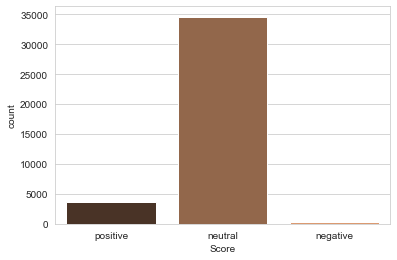

In [133]:
sns.set_style('whitegrid')
sns.countplot(x='Score',data=df, palette='copper')

# VISUALISATION OF SENTIMENT MINING

In [3]:
#Cleaned file of LDA output
final=pd.read_csv("final2.csv")
final.describe()

compound
count  38476.000000
mean       0.463900
std        0.708083
min       -0.999900
25%        0.000000
50%        0.886000
75%        0.973925
max        0.999800

In [4]:
import datetime
from datetime import datetime, timedelta

In [5]:
# Convert the date column from string to datetime
final['N_DATE'] = pd.to_datetime(final.N_DATE).dt.date

In [6]:
df=final.loc[(final['company'])=='APPLE']
df.head()

N_DATE company  compound Sentiment
21274  2021-01-26   APPLE    0.9944  Positive
21457  2021-01-27   APPLE    0.9927  Positive
21458  2021-01-27   APPLE   -0.9484  Negative
21459  2021-01-27   APPLE    0.9927  Positive
21460  2021-01-27   APPLE    0.9633  Positive

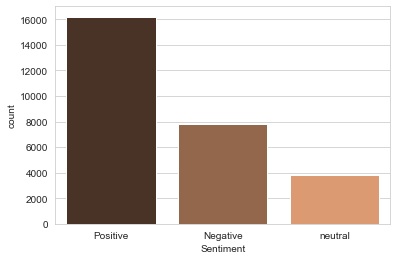

In [143]:
sns.set_style('whitegrid')
sns.countplot(x='Sentiment',data=parsed_and_scored_news, palette='copper')

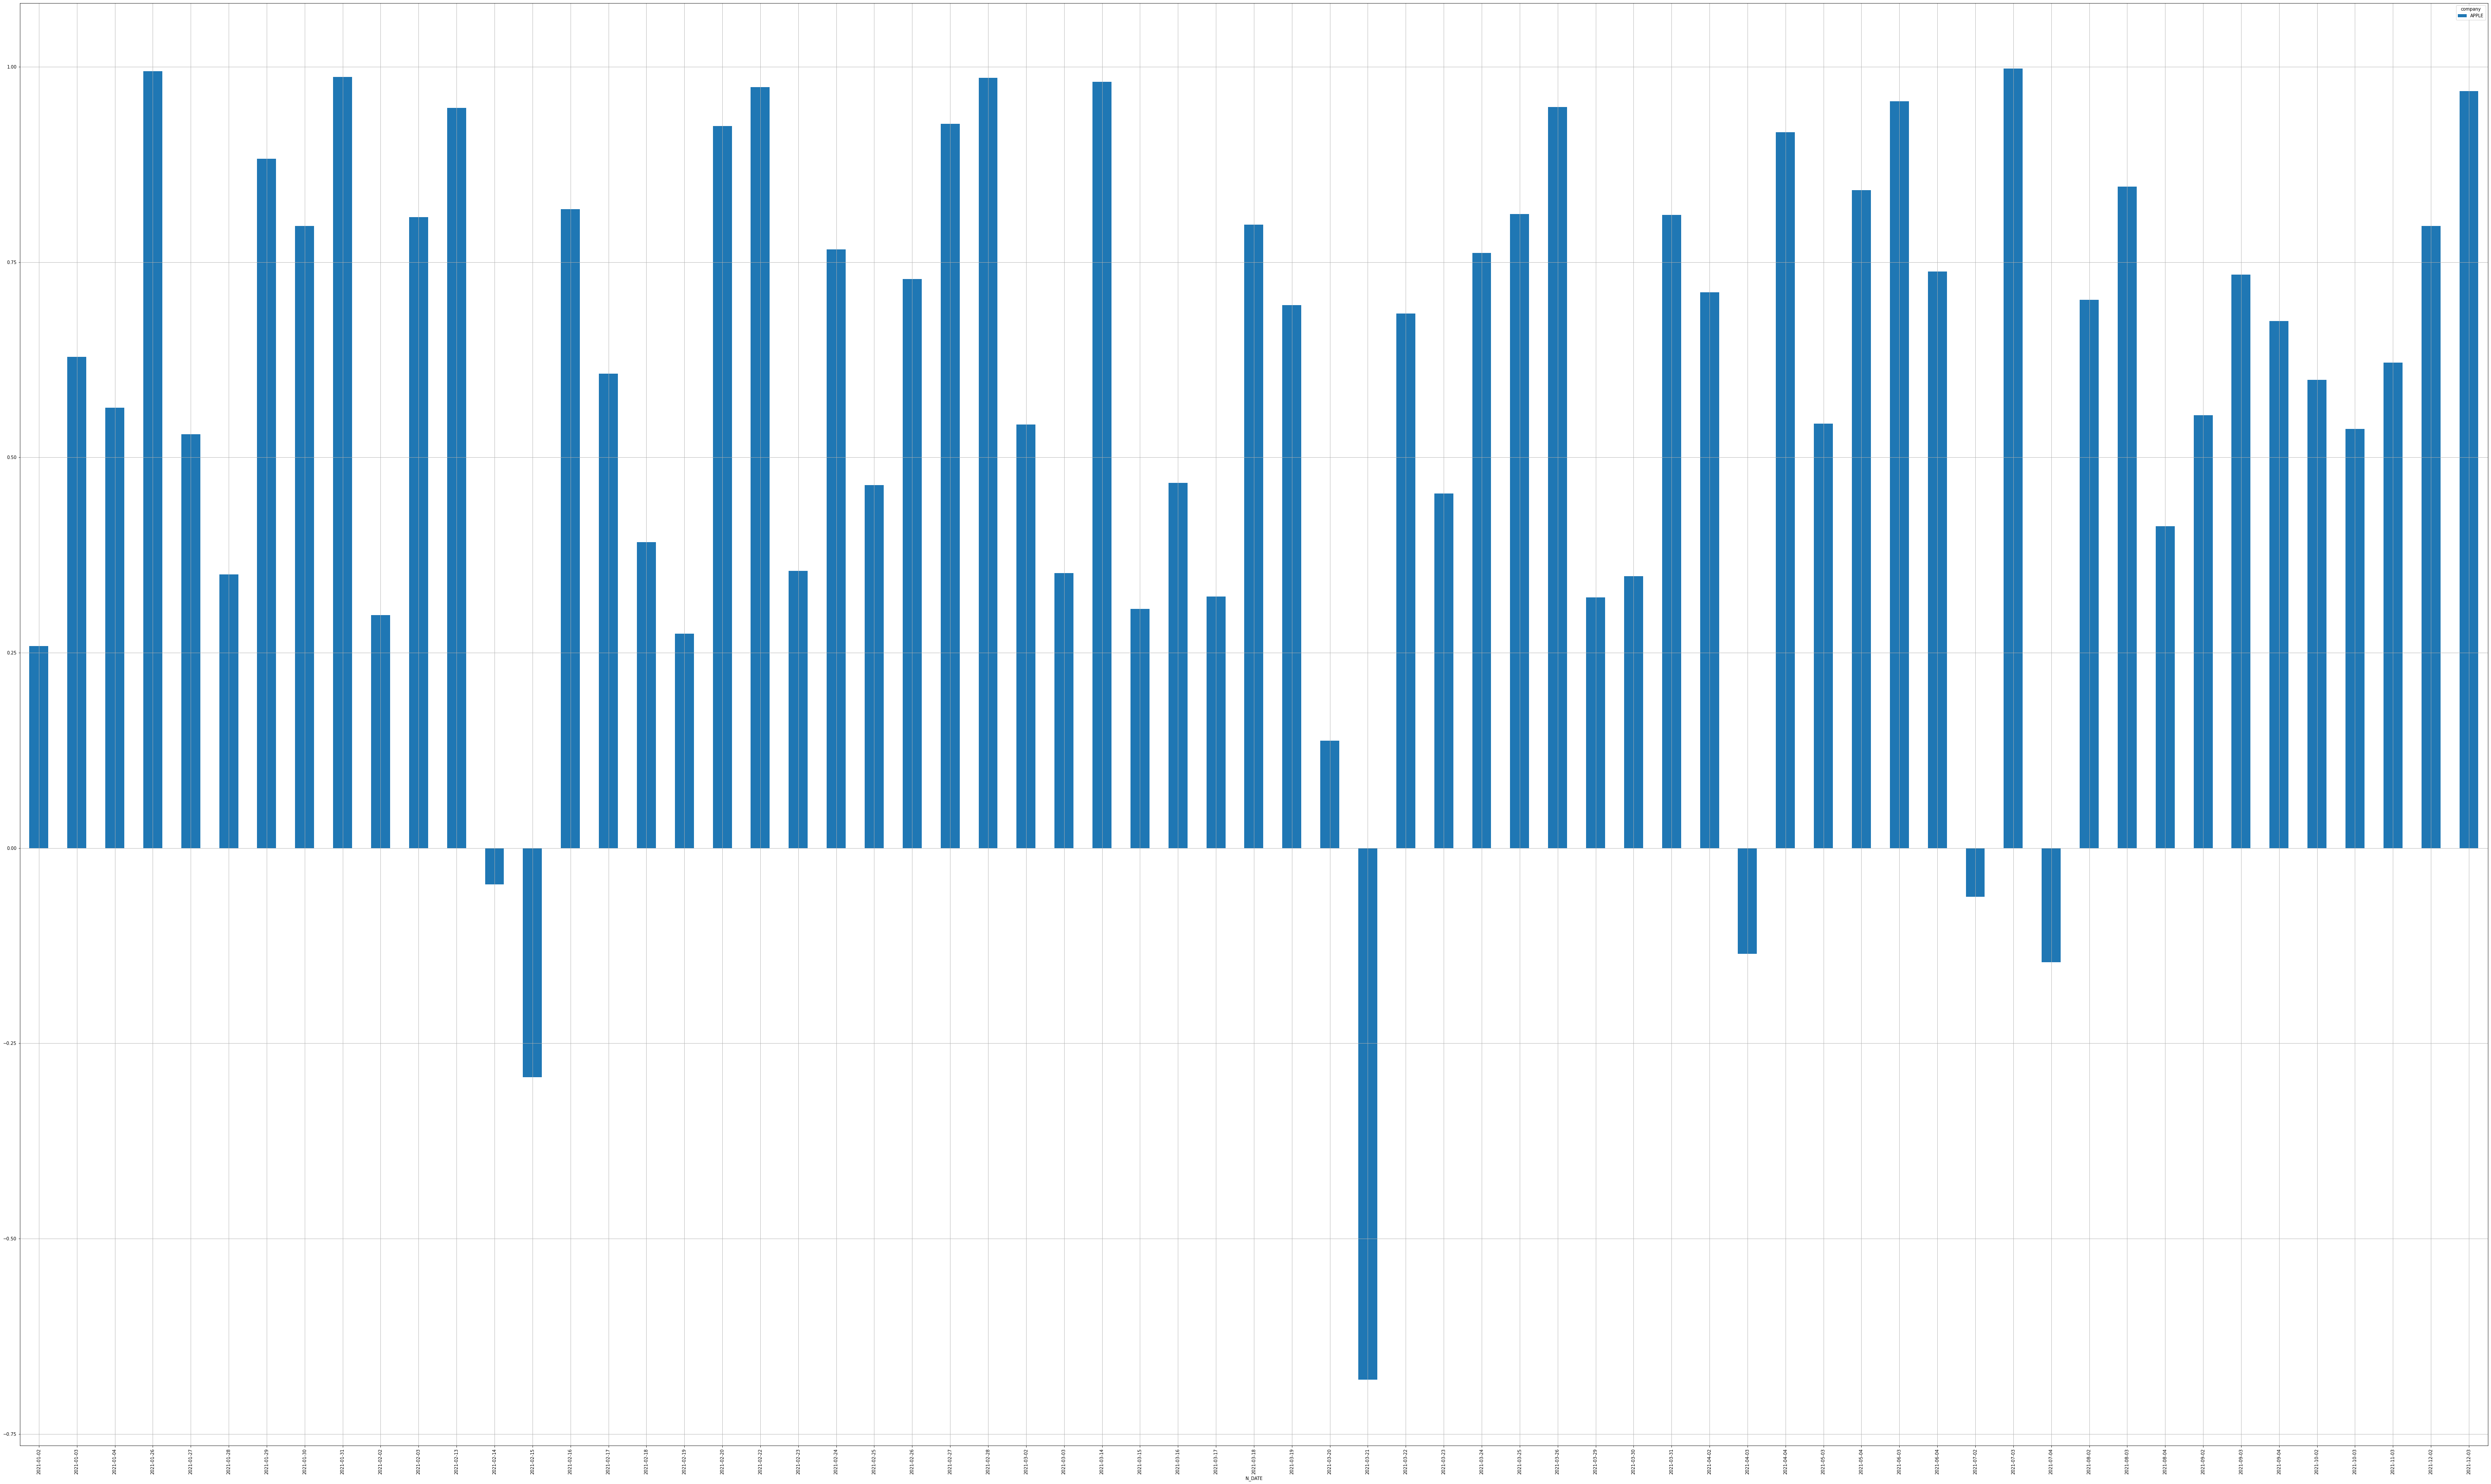

In [7]:

plt.rcParams['figure.figsize'] = [100, 60]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores =  df.groupby(['company','N_DATE']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

In [30]:
from wordcloud import (WordCloud, get_single_color_func, STOPWORDS)
import random
class GroupedColorFunc(object):
    """
    Uses different colors for different groups of words. 
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)
        return self.get_color_func(word)(word, **kwargs)
    
    # Define functions to select a hue of colors arounf: grey, red and green
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(30, 50)

In [38]:
positive=final.loc[(final['Sentiment'])=='Positive']
neutral=final.loc[(final['Sentiment'])=='Neutral']
negative=final.loc[(final['Sentiment'])=='Negative']

In [43]:
positive1 = []
stop_words = set(stopwords.words('english'))


for words in positive['title']:
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    positive1.append(' '.join(filtered_result))
    
    
negative1 = []
stop_words = set(stopwords.words('english'))


for words in negative['title']:
    
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    negative1.append(' '.join(filtered_result))  
    
    
neutral1 = []
stop_words = set(stopwords.words('english'))


for words in neutral['title']:
    
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    neutral1.append(' '.join(filtered_result))      

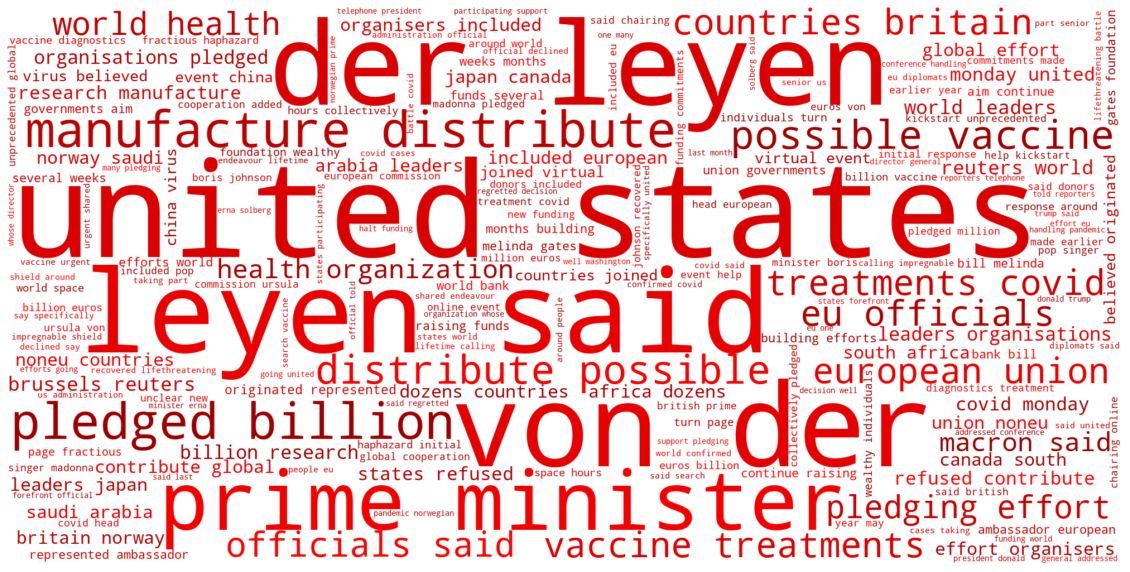

In [44]:
#Using wordcloud to visualize the positive
unique_string=(" ").join(positive1)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud.recolor(color_func=red_color_func, random_state=3),
               interpolation="bilinear")
plt.axis("off")
plt.show()

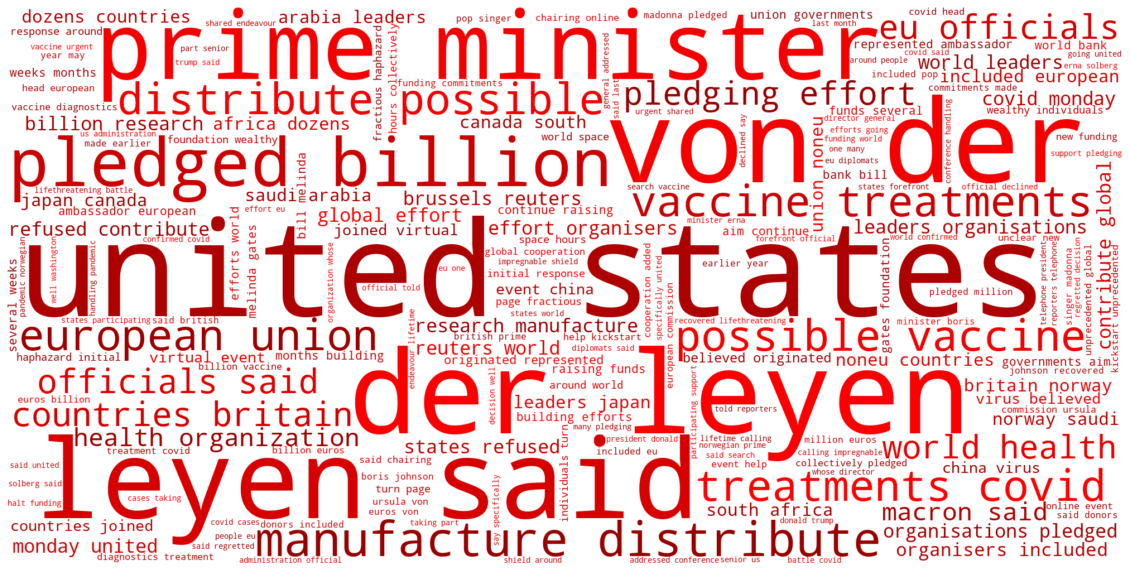

In [45]:
#Using wordcloud to visualize the negative
unique_string=(" ").join(negative1)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud.recolor(color_func=red_color_func, random_state=3),
               interpolation="bilinear")
plt.axis("off")
plt.show()